In [17]:
from sklearn import cross_validation, neighbors, metrics, tree 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
glass = pd.read_csv("glass.csv", header = 0)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(glass.loc[:, glass.columns != 'Type'], glass['Type'], test_size= 0.3)

In [20]:
#алгоритм k-ближайщих соседей

KNN = neighbors.KNeighborsClassifier()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test) 
accuracyKNN = metrics.accuracy_score(y_test, predictions) 

print accuracyKNN

0.630769230769


In [21]:
#алгоритм решающего дерева

tree = tree.DecisionTreeClassifier()
tree.fit(x_train,y_train) 
predictions = tree.predict(x_test) 
accuracyTree = metrics.accuracy_score(y_test, predictions) 

print accuracyTree

0.661538461538


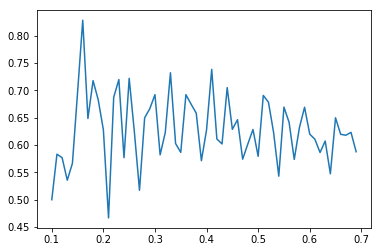

In [22]:
#Зависимость значения ошибки от объема выборки
test=np.arange(0.1, 0.7, 0.01)
y = []
for i in test:
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(glass.loc[:, glass.columns != 'Type'], glass['Type'], test_size= float(i))
    KNN = neighbors.KNeighborsClassifier()
    KNN.fit(x_train, y_train)
    predictions = KNN.predict(x_test) 
    accuracyKNN = metrics.accuracy_score(y_test, predictions) 
    y.append(accuracyKNN)
plt.plot(test, y)
plt.show()
